In [48]:
from epw import epw
import pandas as pd

In [49]:
blddensity=0.15
treecover=0.15
grasscover=0.35

In [50]:
def generate_variants():
    variants = [
        (0.02, 0.29, 0.65),
        #(0.10, 0.20, 0.40),
        (0.07, 0.19, 0.55),  # BASELINE
        #(0.20, 0.10, 0.30),
        (0.17, 0.09, 0.45),
        #(0.30, 0.00, 0.20),
        (0.27, 0.00, 0.35),
        (0.37, 0.00, 0.25)
    ]
    return variants

variants = generate_variants()
variants

[(0.02, 0.29, 0.65),
 (0.07, 0.19, 0.55),
 (0.17, 0.09, 0.45),
 (0.27, 0.0, 0.35),
 (0.37, 0.0, 0.25)]

In [51]:
# def generate_variants():
#     variants = [
#         (0.05, 0.25, 0.50),
#         #(0.10, 0.20, 0.40),
#         (0.15, 0.15, 0.35),  # BASELINE
#         #(0.20, 0.10, 0.30),
#         (0.25, 0.05, 0.20),
#         #(0.30, 0.00, 0.20),
#         (0.35, 0.00, 0.05),
#         (0.45, 0.00, 0.00)
#     ]
#     return variants

# variants = generate_variants()
# variants

In [52]:


# Or if you're creating a new dataframe:
results_df = pd.DataFrame({
   # 'Parameters': ['params_string'],
    #'Temperatures': ['0,1,2,3'],  # Assuming 'temperatures' is your list of results
    # ... other columns as needed
})   
results_df 

""


In [53]:
from uwg import UWG
import pandas as pd

# Define the .epw, .uwg paths to create an uwg object.
epw_path = "EPW_Files/USA_GA_Fulton.County.AP.722195_TMY3.epw" # available in resources directory.

# Initialize an empty list to store results for each variant
results = []

for blddensity, treecover, grasscover in variants:
    # Initialize the UWG model by passing parameters as arguments, or relying on defaults
    #model = UWG.from_param_file(epw_path=epw_path, param_path= "initialize_atlanta.uwg")
    
    
    model = UWG.from_param_args(epw_path=epw_path, 
                                bldheight=11, 
                                blddensity=blddensity, 
                                vertohor=0.8, 
                                treecover=treecover, 
                                grasscover=grasscover, 
                                vegstart=3, 
                                vegend=11, 
                                h_obs= 5, 
                                windmin=0.1,
                                zone='3A', 
                                nday=60,
                                month=7,
                                day=1,                  
# https://github.com/ladybug-tools/uwg/blob/master/resources/initialize_singapore.uwg

albveg=0.25,      # Vegetation albedo
latgrss=0.4,      # Fraction of the heat absorbed by grass that is latent (goes to evaporating water)
lattree=0.6,      # Fraction of the heat absorbed by trees that is latent (goes to evaporating water)
rurvegcover=0.9,  # Fraction of the rural ground covered by vegetation

dtsim = 300,
dtweather = 3600
                               
                              )

    model.generate()
    model.simulate()

    # Write the simulation result to a file.
    temperatures = [ucm.canTemp-273.15 for ucm in model.UCMData[:8760]]

    params_string = f"BD{blddensity:.2f}_TC{treecover:.2f}_GC{grasscover:.2f}"

    # Create a dictionary for this variant's results
    variant_result = {'Parameters': params_string}
    variant_result.update({f'Hour_{i+1}': temp for i, temp in enumerate(temperatures)})

    # Append this variant's results to the results list
    results.append(variant_result)

# Create the final dataframe from all results
results_df = pd.DataFrame(results)

Simulating new temperature and humidity values for 60 days from 7/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
Simulating Day 32
Simulating Day 33
Simulating Day 34
Simulating Day 35
Simulating Day 36
Simulating Day 37
Simulating Day 38
Simulating Day 39
Simulating Day 40
Simulating Day 41
Simulating Day 42
Simulating Day 43
Simulating Day 44
Simulating Day 45
Simulating Day 46
Simulating Day 47
Simulating Day 48
Simulating Day 49
Simulating Day 50
Simulating Day 51
Simulating Day 52
Simu

In [54]:
date_range = pd.date_range(start='7/1/2018', periods=1440, freq='h')
labels = results_df.transpose().iloc[0,:]

results_df_tp = results_df.transpose().iloc[1:,:]
results_df_tp.index = date_range
results_df_tp.columns = labels
results_df_tp

Parameters,BD0.02_TC0.29_GC0.65,BD0.07_TC0.19_GC0.55,BD0.17_TC0.09_GC0.45,BD0.27_TC0.00_GC0.35,BD0.37_TC0.00_GC0.25
2018-07-01 00:00:00,20.084621,20.073107,20.063358,20.057143,20.055535
2018-07-01 01:00:00,19.992215,19.973344,19.958905,19.950677,19.950449
2018-07-01 02:00:00,19.886408,19.844548,19.814234,19.798366,19.800689
2018-07-01 03:00:00,19.788508,19.675397,19.604798,19.577539,19.602312
2018-07-01 04:00:00,19.760674,19.633195,19.560574,19.539676,19.580221
...,...,...,...,...,...
2018-08-29 19:00:00,31.05446,31.323806,31.74119,32.155109,32.512899
2018-08-29 20:00:00,30.610337,30.824272,31.176313,31.505547,31.816598
2018-08-29 21:00:00,30.119036,30.276412,30.545991,30.804349,31.073943
2018-08-29 22:00:00,29.669193,29.787131,29.906931,30.038698,30.199671


In [55]:
results_df_tp.index

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 01:00:00',
               '2018-07-01 02:00:00', '2018-07-01 03:00:00',
               '2018-07-01 04:00:00', '2018-07-01 05:00:00',
               '2018-07-01 06:00:00', '2018-07-01 07:00:00',
               '2018-07-01 08:00:00', '2018-07-01 09:00:00',
               ...
               '2018-08-29 14:00:00', '2018-08-29 15:00:00',
               '2018-08-29 16:00:00', '2018-08-29 17:00:00',
               '2018-08-29 18:00:00', '2018-08-29 19:00:00',
               '2018-08-29 20:00:00', '2018-08-29 21:00:00',
               '2018-08-29 22:00:00', '2018-08-29 23:00:00'],
              dtype='datetime64[ns]', length=1440, freq='h')

In [56]:
#day = 4

#final = results_df_tp[(day*24):(day*24)+24]# .groupby(results_df_tp.index.hour)#.mean()
final = results_df_tp.groupby(results_df_tp.index.hour).mean()
final['hour'] = results_df_tp[0:24].index.hour
final.index = final['hour']
#final.drop(['hour'])
final

Parameters,BD0.02_TC0.29_GC0.65,BD0.07_TC0.19_GC0.55,BD0.17_TC0.09_GC0.45,BD0.27_TC0.00_GC0.35,BD0.37_TC0.00_GC0.25,hour
hour,,,,,,
0,25.137732,25.158682,25.21024,25.276857,25.359082,0
1,24.854107,24.855582,24.893595,24.942716,25.015735,1
2,24.574933,24.568528,24.589449,24.638022,24.708673,2
3,24.312296,24.293469,24.305767,24.365724,24.429875,3
4,24.075423,24.054193,24.082853,24.12938,24.225418,4
5,23.86783,23.848129,23.878049,23.943815,24.039383,5
6,23.964287,24.011442,24.118698,24.238898,24.374293,6
7,24.171358,24.223904,24.267634,24.323309,24.394988,7
8,24.536854,24.550633,24.554352,24.561161,24.590878,8


In [57]:
plotting_df = final
final = final.drop(columns='hour', errors='ignore')

In [58]:
import re

def reformat_column(col):
    match = re.match(r'BD([\d.]+)_TC([\d.]+)_GC([\d.]+)', col)
    if match:
        bd, tc, gc = match.groups()
        return f'BD: {bd}, TC: {tc}, GC: {gc}'
    return col

# Apply the reformatting to all column names
final.columns = [reformat_column(col) for col in final.columns]
final

,"BD: 0.02, TC: 0.29, GC: 0.65","BD: 0.07, TC: 0.19, GC: 0.55","BD: 0.17, TC: 0.09, GC: 0.45","BD: 0.27, TC: 0.00, GC: 0.35","BD: 0.37, TC: 0.00, GC: 0.25"
hour,,,,,
0,25.137732,25.158682,25.21024,25.276857,25.359082
1,24.854107,24.855582,24.893595,24.942716,25.015735
2,24.574933,24.568528,24.589449,24.638022,24.708673
3,24.312296,24.293469,24.305767,24.365724,24.429875
4,24.075423,24.054193,24.082853,24.12938,24.225418
5,23.86783,23.848129,23.878049,23.943815,24.039383
6,23.964287,24.011442,24.118698,24.238898,24.374293
7,24.171358,24.223904,24.267634,24.323309,24.394988
8,24.536854,24.550633,24.554352,24.561161,24.590878


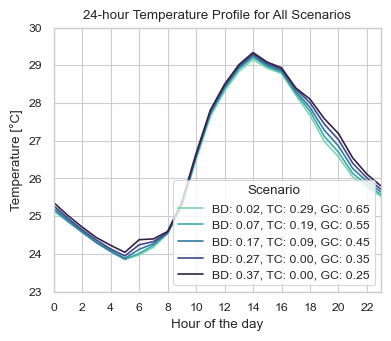

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("paper")

# Assuming 'final' is your DataFrame
# Reset the index to turn the datetime index into a column
final_reset = final.reset_index()

# The datetime column might have a different name, let's find it
datetime_column = final_reset.columns[0]  # Assuming it's the first column

# Melt the DataFrame to create a long format suitable for Seaborn
final_melted = pd.melt(final_reset, id_vars=[datetime_column], var_name='Scenario', value_name='Temperature')

final_melted


palette = sns.color_palette("mako_r", 5)

# Create the plot
plt.figure(figsize=(4, 3.5))
sns.lineplot(data=final_melted, x='hour', y='Temperature', hue='Scenario',palette=palette)

# Customize the plot
plt.title('24-hour Temperature Profile for All Scenarios')
plt.xlabel('Hour of the day')
plt.ylabel('Temperature [°C]')
plt.ylim(23, 30)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 2))

# Adjust legend
#plt.legend(title='Scenarios', bbox_to_anchor=(1.05, 1), loc='upper left')


# Improve layout
plt.tight_layout()


plt.savefig("Diurnal_Hottest_Month_July.pdf")
plt.savefig("Diurnal_Hottest_Month_July.png", dpi= 1200)
# Show the plot
plt.show()

In [60]:
sns.color_palette("icefire",n_colors=8)

[(0.42110294, 0.69916972, 0.80506683),
 (0.2157176, 0.47827123, 0.81487615),
 (0.2659204, 0.25949691, 0.511417),
 (0.14254381, 0.14016944, 0.18944326),
 (0.19884415, 0.12394381, 0.1385669),
 (0.47151732, 0.17401641, 0.24610337),
 (0.78979746, 0.24694858, 0.22678822),
 (0.93850535, 0.52748892, 0.28242464)]

In [61]:
cs = sns.color_palette("icefire",n_colors=8)
final_colors = cs[0:1]
final_colors.append(cs[3]) 
final_colors.extend( cs[5:] )  
final_colors

[(0.42110294, 0.69916972, 0.80506683),
 (0.14254381, 0.14016944, 0.18944326),
 (0.47151732, 0.17401641, 0.24610337),
 (0.78979746, 0.24694858, 0.22678822),
 (0.93850535, 0.52748892, 0.28242464)]

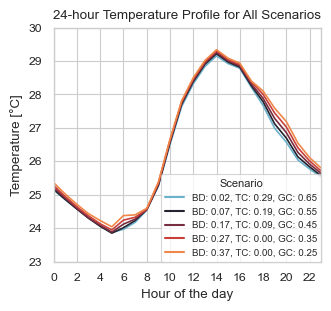

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
sns.set_context("paper")

# Assuming 'final' is your DataFrame
final_reset = final.reset_index()
datetime_column = final_reset.columns[0]

# Melt the DataFrame
final_melted = pd.melt(final_reset, id_vars=[datetime_column], var_name='Scenario', value_name='Temperature')

# Get unique scenarios and set the baseline
scenarios = final_melted['Scenario'].unique()
baseline_scenario = scenarios[2]  # The second scenario as baseline

# Create a custom colormap
color_map = dict(zip(scenarios, final_colors))

# Create the plot
plt.figure(figsize=(3.4, 3.2))
sns.lineplot(data=final_melted, x='hour', y='Temperature', hue='Scenario',
             palette=color_map)

# Customize the plot
plt.title('24-hour Temperature Profile for All Scenarios')
plt.xlabel('Hour of the day')
plt.ylabel('Temperature [°C]')
plt.ylim(23, 30)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 2))

# Adjust legend
sns.move_legend(plt.gca(), "lower right")

# Adjust legend
legend = plt.legend(title='Scenario', title_fontsize='8', fontsize='7', loc='lower right',
                     borderaxespad=0.)

# Reduce the size of legend lines
for line in legend.get_lines():
    line.set_linewidth(1.5)

# Improve layout
plt.tight_layout()

# Save the plot
plt.savefig("Diurnal_Hottest_Month_July.pdf")
plt.savefig("Diurnal_Hottest_Month_July.png", dpi=1200)

# Show the plot
plt.show()

In [63]:
color_map

{'BD: 0.02, TC: 0.29, GC: 0.65': (0.42110294, 0.69916972, 0.80506683),
 'BD: 0.07, TC: 0.19, GC: 0.55': (0.14254381, 0.14016944, 0.18944326),
 'BD: 0.17, TC: 0.09, GC: 0.45': (0.47151732, 0.17401641, 0.24610337),
 'BD: 0.27, TC: 0.00, GC: 0.35': (0.78979746, 0.24694858, 0.22678822),
 'BD: 0.37, TC: 0.00, GC: 0.25': (0.93850535, 0.52748892, 0.28242464)}